In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sb

warnings.filterwarnings("ignore") 

In [344]:
df = pd.read_csv("uber.csv")

In [345]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [346]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [347]:
df.drop(["Unnamed: 0","key"],axis=1, inplace=True)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [349]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

In [350]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['month'] = df.pickup_datetime.dt.month
df['year'] = df.pickup_datetime.dt.year

In [351]:
df.drop('pickup_datetime',axis=1,inplace=True)

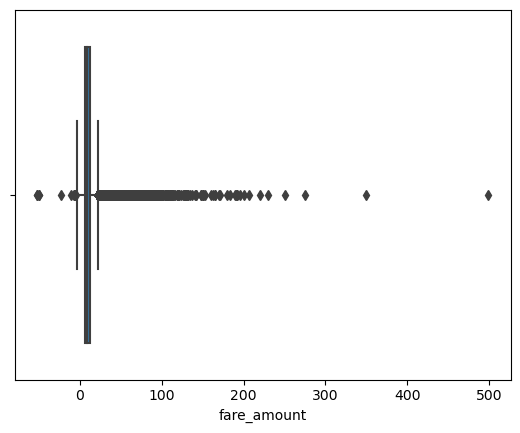

In [352]:
sb.boxplot(data = df,x = "fare_amount");

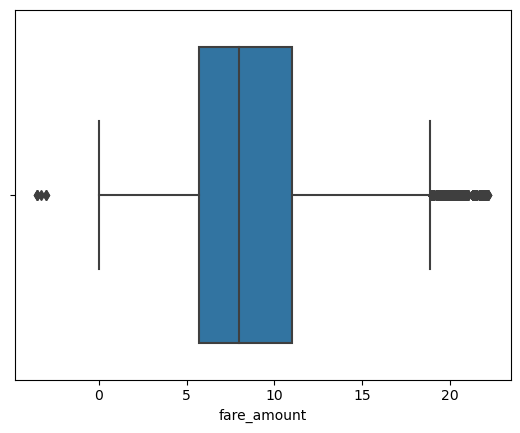

In [353]:
#Remove Outliers
q1 = df["fare_amount"].quantile(0.25)
q3  = df["fare_amount"].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

df = df[(df["fare_amount"] <= upper_bound) & (df["fare_amount"] >= lower_bound)]
sb.boxplot(data = df,x = "fare_amount");

In [354]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'month',
       'year'],
      dtype='object')

In [355]:
from sklearn.preprocessing import StandardScaler
x = df.drop('fare_amount',axis = 1)
y = df['fare_amount']
std = StandardScaler()
std_x = std.fit_transform(x)

In [356]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year
fare_amount,1.000000,0.000401,-0.000844,-0.000816,0.000403,0.012625,0.026331,0.135179
pickup_longitude,0.000401,1.000000,-0.980262,0.954614,-0.942598,-0.000977,-0.003101,0.009596
pickup_latitude,-0.000844,-0.980262,1.000000,-0.942301,0.962166,-0.000484,0.004104,-0.011770
dropoff_longitude,-0.000816,0.954614,-0.942301,1.000000,-0.980809,-0.000191,-0.001862,0.009168
dropoff_latitude,0.000403,-0.942598,0.962166,-0.980809,1.000000,-0.001682,0.003226,-0.011370
passenger_count,0.012625,-0.000977,-0.000484,-0.000191,-0.001682,1.000000,0.009620,0.002371
month,0.026331,-0.003101,0.004104,-0.001862,0.003226,0.009620,1.000000,-0.115990
year,0.135179,0.009596,-0.011770,0.009168,-0.011370,0.002371,-0.115990,1.000000


In [357]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size = 0.2, random_state = 42)

In [358]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [359]:
#Check Error
predict = model.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", rmse)

RMSE error for the model is  4.100164786779416


In [360]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 101)

#Fit the Forest
model.fit(x_train, y_train)
predict = model.predict(x_test)

#Errors for the forest
rmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE value for Random Forest is:",rmse)

RMSE value for Random Forest is: 2.2243233902661013
